In [1]:
%matplotlib inline
from scipy import optimize
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')


# helpers

def calc_lv(temp):
    """Helper to calculate enthalpy of evaporation
    Inputs: temp, (K), float
    
    Outputs: lv, (J kg^-1), float
    
    """
    
    # constants
    l0 = 2.501e6 # J kg^-1
    T0 = 273.15 # K
    
    cpv = 1870. # J kg^-1 K^-1
    cl = 4187. # J kg^-1 K^-1
        
    lv = (cpv - cl)*(temp - T0) + l0
    
    return(lv)


def calc_phil(temp):
    """Helper to calculate liquid entropy
    Inputs: temp, (K), float
    
    Outputs: phil, (J kg^-1 K^-1), float
    
    """
    
    # constants
    cl = 4187. # J kg^-1 K^-1
    Tp = 273.16 # K
    
    phil = cl*np.log(temp/Tp)
    
    return(phil)


def root_func_es(es_guess, temp, lv, phil):
    """Guess function for es
    Inputs: temp, (K), float
            lv, (J kg^-1), float
            phil, (J kg^-1 K^-1), float
    
    Outputs: difference between guess and target -- should be 0 when es is a root
    
    """
    
    # constants
    cpv = 1870. # J kg^-1 K^-1 
    Tp = 273.16 # K
    Rv = 461.5 # J kg^-1 K^-1
    es0 = 6.11*100 # Pa
    
    lv0 = 2.501e6 # J kg^-1
    phi0 = lv0/Tp # J kg^-1 K^-1
    
    phiv_guess = cpv*np.log(temp/Tp) - Rv*np.log(es_guess/es0) + phi0
    
    temp_guess = lv/(phiv_guess - phil)
    
    return temp - temp_guess

In [2]:
# main rootfinding function

def calc_es(temp):
    """Use rootfind to calculate saturation vapour pressure
    
    Inputs: temp, (C), float 
    
    Outputs: es, (Pa), float 
    
    """
    temp = temp + 273.15 # K
    
    phil = calc_phil(temp)
    lv = calc_lv(temp)
    
    left = 0 # Pa
    right = 10000 # Pa
    
    es = optimize.zeros.brentq(root_func_es,left,right,args=(temp, lv, phil))
    
    return(es)

In [3]:
temps = np.linspace(0,20,10) # C

root_es_list = []
for temp in temps:
    root_es_list.append(calc_es(temp)/100.)
    print('es = {:5.2f} hPa at temp of {:5.2f} C'.format(root_es_list[-1],temp))

es =  6.11 hPa at temp of  0.00 C
es =  7.17 hPa at temp of  2.22 C
es =  8.38 hPa at temp of  4.44 C
es =  9.78 hPa at temp of  6.67 C
es = 11.38 hPa at temp of  8.89 C
es = 13.21 hPa at temp of 11.11 C
es = 15.29 hPa at temp of 13.33 C
es = 17.65 hPa at temp of 15.56 C
es = 20.33 hPa at temp of 17.78 C
es = 23.35 hPa at temp of 20.00 C


C:\Users\Timothy\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: RuntimeWarning: divide by zero encountered in log


In [4]:
# equation 17 (Thompkins 2.13)

def approx_es(temp):
    """Simple form of Clausius-Clapeyron equation for saturated vapor pressure
    
    Inputs: temp, (C), float 
    
    Outputs: es, (Pa), float 
    
    """
    
    T0 = 273.15 # K
    Rv = 461.5 # J kg^-1 K^-1
    es0 = 6.11*100 # Pa

    temp = temp + 273.15 # K
    lv = calc_lv(temp)
    
    es = es0*np.exp(lv/Rv*(1/T0 - 1/temp))
    
    return(es)

approx_es_list = []

for temp in temps:
    approx_es_list.append(approx_es(temp)/100.)
    print('approx es = {:5.2f} hPa at temp of {:5.2f} C'.format(approx_es_list[-1],temp))

approx es =  6.11 hPa at temp of  0.00 C
approx es =  7.17 hPa at temp of  2.22 C
approx es =  8.38 hPa at temp of  4.44 C
approx es =  9.77 hPa at temp of  6.67 C
approx es = 11.36 hPa at temp of  8.89 C
approx es = 13.16 hPa at temp of 11.11 C
approx es = 15.21 hPa at temp of 13.33 C
approx es = 17.52 hPa at temp of 15.56 C
approx es = 20.13 hPa at temp of 17.78 C
approx es = 23.07 hPa at temp of 20.00 C


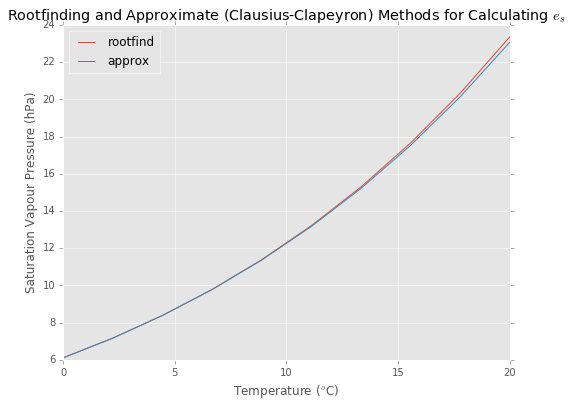

In [5]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(temps, root_es_list, label="rootfind")
ax.plot(temps, approx_es_list, label="approx")
ax.set_xlabel(r"Temperature ($^o$C)")
ax.set_ylabel(r"Saturation Vapour Pressure (hPa)")
ax.set_title(r"Rootfinding and Approximate (Clausius-Clapeyron) Methods for Calculating $e_s$")
ax.legend(loc="best")